<a href="https://colab.research.google.com/github/muhammadsajad/Projects/blob/main/Customer_Churn_prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import sklearn
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:

# Give the path of kaggle.jason file in order to download data directly from kaggle.
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d aakash50897/churn-modellingcsv

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 33.4MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  churn-modellingcsv.zip
  inflating: Churn_Modelling.csv     


In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Finding any missing values in any columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Checking any duplicated row present
df.duplicated().sum()

0

In [ ]:
# Check how many customers leaved the bank and how many are still in touch with bank
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
# Just to check that how many categories are present in geoghropy column
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
# Just checking that how many males and females are present in our dataset
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
# We have to drop a few columns name 'RowNumber','CustomerId', and 'Surname' becuase they haven't any role in our training the model
# using inplace=True just to drop columns in run time
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# We have to perform one hot encoding on following columns
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True) # This will create the three columns of selected columns but we are droping the first one because if in both columns 0 is present it atomaticallys the the first one

In [ ]:
df.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


In [ ]:
# Now performing trian test split on our data
X=df.drop(columns=['Exited'])
y=df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
y_train.shape

(8000,)

In [ ]:
# performing normalization/ scalling so that model converge fastly
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
# Now creating our model, having onput layer containing 3 hdden units and one oupt layer containing one unit
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
# Fitting the model on our given data
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 3ms/step - loss: 0.5852 - accuracy: 0.7255 - val_loss: 0.5015 - val_accuracy: 0.8037
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.8067 - val_loss: 0.4427 - val_accuracy: 0.8144
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8184 - val_loss: 0.4187 - val_accuracy: 0.8256
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8272 - val_loss: 0.4019 - val_accuracy: 0.8319
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3881 - accuracy: 0.8358 - val_loss: 0.3900 - val_accuracy: 0.8388
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.8408 - val_loss: 0.3795 - val_accuracy: 0.8413
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3696 - accuracy: 0.8455 - val_loss: 0.3723 - val_accuracy: 0.8469

In [ ]:
# Now check the values of weights and biases of first hiddent layer of model
# 33 wieghts/parameters and 3 biases

model.layers[0].get_weights()

[array([[ 7.91200204e-04,  9.67245102e-02, -3.99611682e-01,
         -6.13169730e-01,  4.01134603e-02,  4.50866103e-01,
          1.14657059e-01, -5.81775494e-02,  9.02851447e-02,
          6.79894984e-01,  7.46929348e-02],
        [ 1.16410106e-01, -9.35099572e-02, -1.21229410e-01,
          6.27643093e-02,  5.67769371e-02,  4.33692783e-01,
          6.63347721e-01, -5.34511387e-01,  1.21082209e-01,
          3.64030525e-02, -7.55164266e-01],
        [ 3.68644819e-02,  5.16407669e-01,  4.11398523e-02,
         -2.92299211e-01,  4.73554015e-01, -2.09633559e-01,
         -2.18277887e-01,  5.65829501e-02, -7.13275149e-02,
         -6.04481220e-01, -4.56680357e-02],
        [ 9.70449209e-01,  2.38599703e-01,  1.67684481e-01,
          2.20033184e-01,  1.12846166e-01,  2.64916688e-01,
          5.31886481e-02,  7.59028345e-02,  8.04219186e-01,
         -2.07850218e-01, -1.95722673e-02],
        [-2.17395633e-01, -7.96911240e-01, -6.10271990e-01,
         -1.46317557e-01,  7.20950484e-01, -

In [ ]:
# Now predicting the results
model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


array([[0.01978542],
       [0.08983488],
       [0.04723247],
       ...,
       [0.00806403],
       [0.02979212],
       [0.35518074]], dtype=float32)

In [ ]:
# Selecting a threshold value in order to predict the person leave the bank or not
# Here we are selecting a threshold of 0.5, greater than 0.5 will not leave the bank and vice versa
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [ ]:
y_pred=np.where(y_log>0.5,1,0)

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# Now calculating the accuracy score
accuracy_score(y_test,y_pred)

0.86

In [ ]:
history

In [ ]:
history.history

{'loss': [0.5852183699607849,
  0.4655652344226837,
  0.4227013885974884,
  0.4025570750236511,
  0.3880951702594757,
  0.3773014545440674,
  0.36962220072746277,
  0.36356261372566223,
  0.3595210313796997,
  0.3565915822982788,
  0.35436075925827026,
  0.35288485884666443,
  0.35066676139831543,
  0.3496253490447998,
  0.34789958596229553,
  0.3477906286716461,
  0.3459903597831726,
  0.3454350233078003,
  0.3445954918861389,
  0.34397342801094055,
  0.34361377358436584,
  0.3431752920150757,
  0.34229591488838196,
  0.34239235520362854,
  0.34186217188835144,
  0.3414454758167267,
  0.3408081829547882,
  0.3406316339969635,
  0.3401222229003906,
  0.33912667632102966,
  0.3395622968673706,
  0.3391875922679901,
  0.3391794264316559,
  0.33881962299346924,
  0.3383987545967102,
  0.33776718378067017,
  0.33806926012039185,
  0.33722010254859924,
  0.33702027797698975,
  0.33695289492607117,
  0.3367922306060791,
  0.3363174796104431,
  0.3358169198036194,
  0.3351861238479614,
  0.33

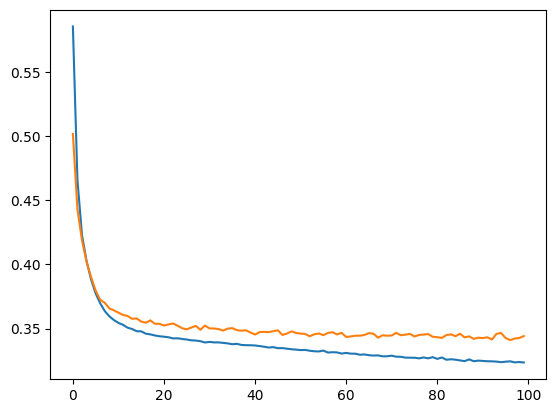

In [ ]:
# Ploting train loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


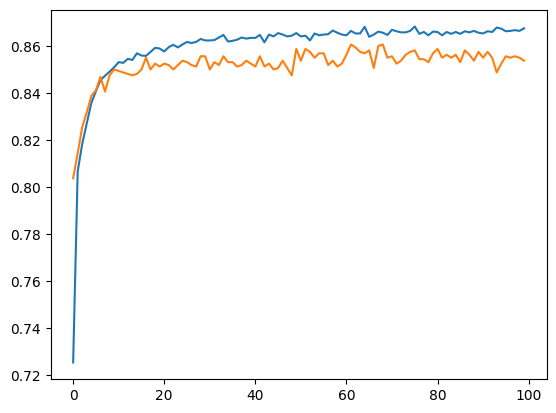

In [ ]:
# ploting train accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])